<a href="https://colab.research.google.com/github/KirillSmirnov2/InnopolisStudentPublicRepository/blob/main/HW7_SmirnovKK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Домашнее задание №6





Для домашнего задания можно использовать любой датафрейм большим количеством численных данных. Выполнить задачи:

1. Обеспечить центрирование численных данных

2. Вычислить расстояния между точками (в качестве координат по иксу взять один столбец, в качестве координат по игреку другой). Построить матрицу расстояний. Если датафрейм большой, взять выборку из 10 значений.

3. Применить интерполяцию для замены пропусков, если в датафрейме есть пропуски, либо построить график по любому столбцу. Если датафрейм большой, взять выборку из 10 значений.

4. Загрузить из сети любую картинку, изменить у неё контрастность и яркость.

In [108]:
import numpy as np
import pandas as pd
import math
import time

import matplotlib.pyplot as plt
import seaborn as sns
import statistics
from itertools import filterfalse
from sklearn.linear_model import LinearRegression
import random

---
Задача 1
 Загрузить датaфрейм, Обеспечить центрирование численных данных:


---

In [109]:
df=pd.read_csv('Data _hw6_3.csv')
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606 entries, 0 to 605
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   well      606 non-null    object 
 1   type      606 non-null    object 
 2   X0        606 non-null    float64
 3   Y0        606 non-null    float64
 4   X1        606 non-null    float64
 5   Y1        606 non-null    float64
 6   X3        606 non-null    int64  
 7   Y3        606 non-null    int64  
 8   UP        606 non-null    object 
 9   endpoint  606 non-null    object 
dtypes: float64(4), int64(2), object(4)
memory usage: 47.5+ KB


,X0,Y0,X1,Y1,X3,Y3
count,606.000000,606.000000,606.000000,606.000000,606.000000,606.000000
mean,236726.948644,173236.922889,236359.367696,172918.469830,236232.843234,172804.136964
std,13544.225469,7123.182612,13935.042164,7103.776482,13984.115485,7178.154879
min,209298.718000,159792.955900,206618.000000,158700.000000,206006.000000,158315.000000
25%,227682.750000,167043.318800,227054.250000,166894.000000,226858.750000,166853.000000
50%,235378.000000,173807.150000,234927.000000,173847.500000,234847.500000,173837.000000
75%,244441.250000,177914.250000,244441.250000,177912.000000,244221.750000,177970.750000
max,273921.000000,194656.235700,273921.000000,194733.000000,274282.000000,195192.000000


In [110]:
X0=df['X0'].values
Y0=df['Y0'].values
arrX0=np.array(X0)
arrY0=np.array(Y0)

arrX1=np.array(df['X1'].values)
arrY1=np.array(df['Y1'].values)

arrX3=np.array(df['X3'].values)
arrY3=np.array(df['Y3'].values)
X0ave=np.mean(arrX0)  # df['X0'].mean()
Y0ave=np.mean(arrY0)  #Y0ave=df['Y0'].mean()

X0std=np.std(arrX0)  # df['X0'].mean()
Y0std=np.std(arrY0)
print(f'среднее значение координаты Х:  {X0ave/1000}, среднее значение координаты Y:  {Y0ave/1000}')
centerX0 = (arrX0-X0ave)/X0std
centerY0 = (arrY0-Y0ave)/Y0std
#print(f'до центрирования  :  {arrX0/1000}')
print(f'после  центрирования  :  {centerX0}')

среднее значение координаты Х:  236.72694864422442, среднее значение координаты Y:  173.2369228891089
после  центрирования  :  [-9.96781263e-02 -3.81506775e-01 -2.98376930e-01 -2.24631521e-01
 -1.41427782e-01 -9.13020533e-01 -1.14127661e+00 -1.02600323e+00
 -9.20188173e-01 -8.04914787e-01 -1.24709167e+00 -1.19012002e+00
 -1.11460117e+00 -1.17652367e+00 -1.11408392e+00 -1.18369131e+00
 -1.10233490e+00 -1.01321971e+00 -5.53308456e-01 -9.66223634e-01
 -4.30054605e-01 -3.71752873e-01 -5.17322469e-01 -4.34118731e-01
 -3.56309195e-01 -5.92324063e-01 -2.88031883e-01 -3.55348584e-01
 -2.81603174e-01 -3.81506775e-01 -2.95273416e-01  1.85112474e-03
 -2.61543965e-02 -6.70429171e-01 -3.66136991e-01 -2.50863605e-01
 -3.15485998e-02 -5.20721556e-01 -4.26212159e-01 -2.05123717e-01
 -2.80864243e-01 -3.52245070e-01 -2.32833665e-01 -1.67659867e-01
 -2.07931658e-01 -4.51114166e-01 -3.52540642e-01 -1.94630883e-01
 -2.45764975e-01 -8.03181090e-02  2.88562948e-03 -3.90078386e-01
 -1.29161511e-01 -3.64255507

== ==================================================== == ==========================================

Задача 2  Вычислить расстояния между точками (в качестве координат по иксу взять один столбец, в качестве координат по игреку другой). Построить матрицу расстояний. Если датафрейм большой, взять выборку из 10 значений..

== ==================================================== == ==========================================

In [111]:
print(len(arrX0))
print(arrX0[605])
S=range(len(arrX0))
ran=random.sample(S, 20)
print(ran)
vib1X0=[]
vib1Y0=[]
vib1=[]
vib2X0=[]
vib2Y0=[]
vib2=[]
sw=0
for i in ran:
  if sw == 0:
    vib1X0.append(arrX0[i])
    vib1Y0.append(arrY0[i])
    vib1.append([arrX0[i],arrY0[i]])
    sw=1
  else:
    vib2X0.append(arrX0[i])
    vib2Y0.append(arrY0[i])
    vib2.append([arrX0[i],arrY0[i]])
    sw=0
arr_vib1=np.array(vib1)
arr_vib2=np.array(vib2)
print(arr_vib2)
arr_vib1X0=np.array(vib1X0)
arr_vib1Y0=np.array(vib1Y0)
arr_vib2X0=np.array(vib2X0)
arr_vib2Y0=np.array(vib2Y0)
#print('vib 1 X',arr_vib1X0,'vib 1 Y', arr_vib1Y0)
#print('vib 2 X',arr_vib2X0,'vib 2 Y', arr_vib2Y0)

arr_vib2X0 = arr_vib2X0[:, np.newaxis]
arr_vib2Y0 = arr_vib2Y0[:, np.newaxis]
#print('vib 2 X',arr_vib2X0,'vib 2 Y', arr_vib2Y0)

606
237644.0
[280, 492, 344, 235, 80, 366, 65, 44, 565, 26, 17, 531, 422, 255, 24, 180, 403, 270, 198, 15]
[[238085.8791 163325.9508]
 [239915.     177915.    ]
 [272256.     169807.    ]
 [233913.     175750.    ]
 [232829.     177974.    ]
 [222696.     178870.    ]
 [241764.6498 161191.1893]
 [228655.     178910.    ]
 [235816.8522 162466.3989]
 [220708.     177202.    ]]


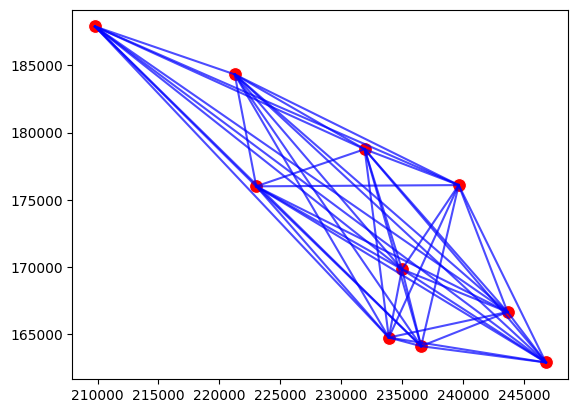

In [112]:
#plt.scatter(arr_vib1X0,arr_vib1Y0)
#plt.scatter(arrX0,arrY0)
sns.scatterplot(x=arr_vib1[:,0], y=arr_vib1[:,1],color='red',s=100)
n=len(arr_vib1)
for i in range(n):
  for j in range(i+1,n):
    xx=[arr_vib1[i,0],arr_vib1[j,0]]
    yy=[arr_vib1[i,1],arr_vib1[j,1]]
    plt.plot(xx,yy,'b-',alpha=0.7)


[[    0.         10304.43364088  7524.6587298   5930.24999473
  12361.34571962 18000.16469369  2725.58217674 15355.59471333
  35774.66916385 25332.07160952]
 [10304.43364088     0.          4899.94877058 13692.25457832
  15001.57782663 27125.15930527 13014.81390852 21732.99628957
  44620.40814328 33312.82997285]
 [ 7524.6587298   4899.94877058     0.          9223.4272372
  10247.08002311 22623.94386485  9916.31693888 16842.64397296
  39932.07833798 28499.95289417]
 [ 5930.24999473 13692.25457832  9223.4272372      0.
   7796.45695172 13442.96760392  5189.73178469  9432.13538919
  30967.75103226 19943.08596757]
 [12361.34571962 15001.57782663 10247.08002311  7796.45695172
      0.         16601.25492244 12697.62093428  8159.51867453
  32066.94258322 20122.78766547]
 [18000.16469369 27125.15930527 22623.94386485 13442.96760392
  16601.25492244     0.         15639.10968271  9308.58206173
  17775.08230921  8505.35510662]
 [ 2725.58217674 13014.81390852  9916.31693888  5189.73178469
  126

<Axes: >

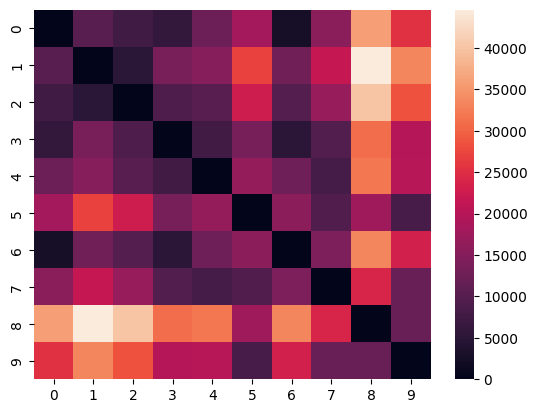

In [113]:
differences=arr_vib1[:, np.newaxis ]-arr_vib1
squared_distances=np.sum(differences**2,axis=2)
distances=np.sqrt(squared_distances)
print(distances)
sns.heatmap(distances,annot=False)

== ==================================================== == ==========================================

Задача 3 Применить интерполяцию для замены пропусков, если в датафрейме есть пропуски, либо построить график по любому столбцу. Если датафрейм большой, взять выборку из 10 значений.

== ==================================================== == ==========================================

In [120]:
df2=pd.read_csv('Data _hw6_5_.csv')
df2.info()
df2.describe()
print(df2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Q       19 non-null     float64
 1   L25     17 non-null     float64
dtypes: float64(2)
memory usage: 432.0 bytes
         Q       L25
0   1.8001  2.675393
1   2.0001  2.927894
2   2.2001  3.168267
3   2.4001  3.396262
4   2.5001       NaN
5   2.6001  3.609570
6   2.8001  3.809635
7   2.9001  3.997294
8   3.2001  4.173478
9   3.4001  4.335571
10  3.5001  4.493540
11  3.8001  4.638246
12  4.0001  4.773332
13  4.2001  4.893755
14  4.3001  5.010357
15  4.5001       NaN
16  4.6001  5.114246
17  4.8001  5.211426
18  4.9001  5.302884


[2.675393 2.927894 3.168267 3.396262 3.60957  3.809635 3.997294 4.173478
 4.335571 4.49354  4.638246 4.773332 4.893755 5.010357 5.114246 5.211426
 5.302884] 17
[1.8001 2.0001 2.2001 2.4001 2.6001 2.8001 2.9001 3.2001 3.4001 3.5001
 3.8001 4.0001 4.2001 4.3001 4.6001 4.8001 4.9001] 17
-----------------------------
[1.8  1.86 1.92 1.98 2.04 2.1  2.16 2.22 2.28 2.34 2.4  2.46 2.52 2.58
 2.64 2.7  2.76 2.82 2.88 2.94 3.   3.06 3.12 3.18 3.24 3.3  3.36 3.42
 3.48 3.54 3.6  3.66 3.72 3.78 3.84 3.9  3.96 4.02 4.08 4.14 4.2  4.26
 4.32 4.38 4.44 4.5  4.56 4.62 4.68 4.74 4.8 ]
[2.675393   2.75101705 2.82676735 2.90251765 2.97584841 3.04796031
 3.12007221 3.1909525  3.259351   3.3277495  3.396148   3.46014775
 3.52414015 3.58813255 3.64948297 3.70950247 3.76952197 3.84697914
 3.95957454 4.02072647 4.05596327 4.09120007 4.12643687 4.16167367
 4.20581555 4.25444345 4.30307135 4.36700683 4.46178823 4.5127859
 4.5417271  4.5706683  4.5996095  4.6285507  4.66519566 4.70572146
 4.74624726 4.78531409 4

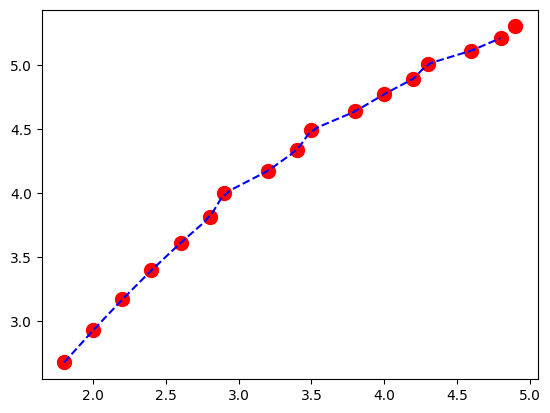

In [141]:
z3_Y=df2['L25'].loc[df2['L25'].isna()==False].values
z3_X=df2['Q'].loc[df2['L25'].isna()==False].values
print(z3_Y,len(z3_Y))
print(z3_X,len(z3_X))

arr_z3_Y=np.array(z3_Y)
arr_z3_X=np.array(z3_X)
print('-----------------------------')
x_new=np.linspace(1.8 , 4.8, 51)
y_new=np.interp(x_new,arr_z3_X,arr_z3_Y)
print(x_new)
print(y_new)
plt.scatter(arr_z3_X, arr_z3_Y, label='ish tochki', color = 'red',s=100)
plt.plot(x_new,y_new, label ='interpol', linestyle='--', color='blue')

In [119]:
df2.interpolate(method='linear',axis=0,inplace=True)
print(df2)

         Q       L25
0   1.8001  2.675393
1   2.0001  2.927894
2   2.2001  3.168267
3   2.4001  3.396262
4   2.5001  3.502916
5   2.6001  3.609570
6   2.8001  3.809635
7   2.9001  3.997294
8   3.2001  4.173478
9   3.4001  4.335571
10  3.5001  4.493540
11  3.8001  4.638246
12  4.0001  4.773332
13  4.2001  4.893755
14  4.3001  5.010357
15  4.5001  5.062302
16  4.6001  5.114246
17  4.8001  5.211426
18  4.9001  5.302884


== ==================================================== == ==========================================

Задача 4 Загрузить из сети любую картинку, изменить у неё контрастность и яркост.

== ==================================================== == ==========================================

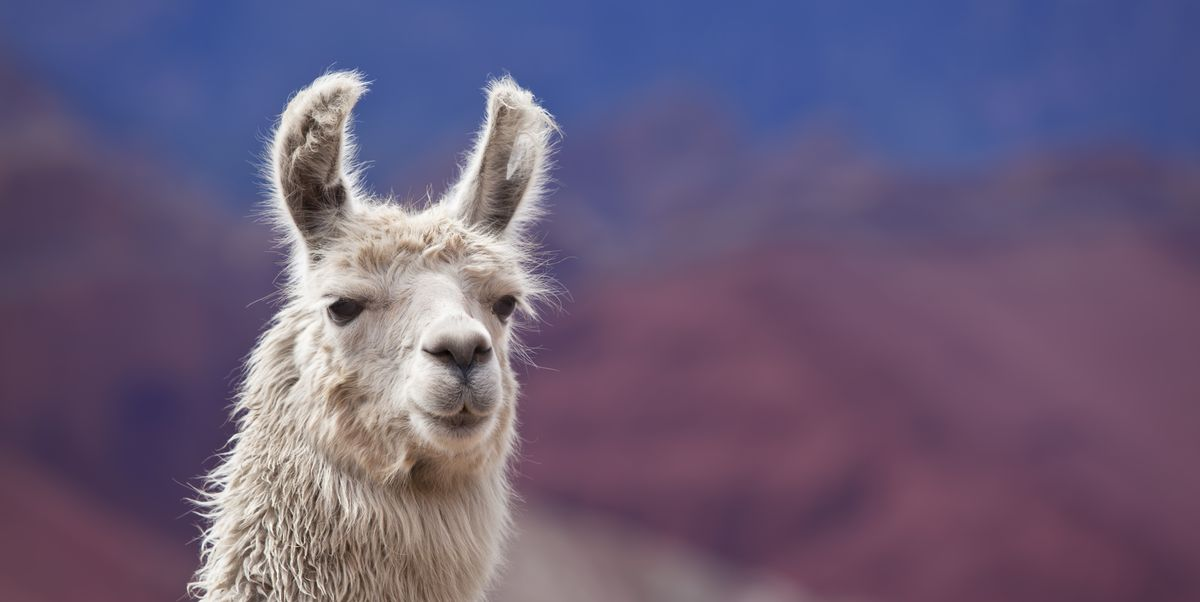

In [167]:
import cv2
from urllib.request import urlopen
import numpy as np
from google.colab.patches import cv2_imshow
resp=urlopen("https://hips.hearstapps.com/hmg-prod/images/white-llama-in-argentina-south-america-salta-royalty-free-image-154948449-1532379487.jpg?crop=1.00xw:0.753xh;0,0.105xh&resize=1200:*")
image_array=np.asarray(bytearray(resp.read()),dtype=np.uint8)
image=cv2.imdecode(image_array,cv2.IMREAD_COLOR)
cv2_imshow(image)



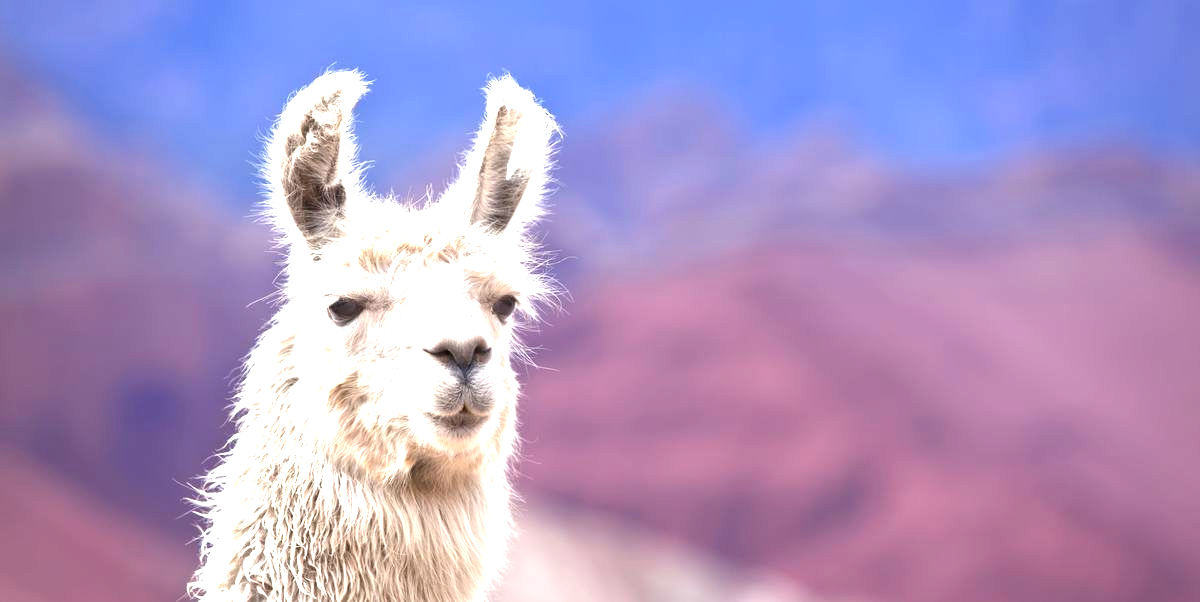

In [173]:
brightness_factor=1.7
brightened_image=cv2.multiply(image, np.array([brightness_factor]))
brightened_image=np.clip(brightened_image, 0 ,255).astype(np.uint8)
cv2_imshow(brightened_image)


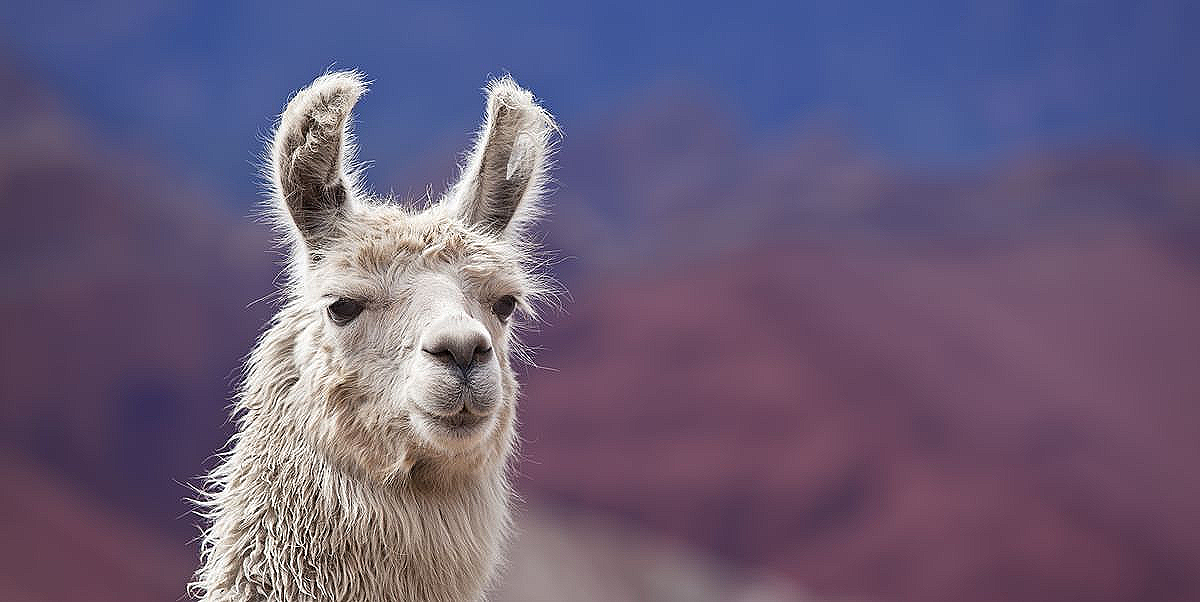

In [174]:
filter=np.array([[0,-1,0],[-1,5,-1],[0,-1,0]], dtype=np.float32)
result_image2=cv2.filter2D(image,-1,filter)
cv2_imshow(result_image2)

